In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
housing = pd.read_csv('Data/Housing_Prices_Final.csv')
housing = housing.drop('Id', axis=1)

In [10]:
housing.describe()

,SalePrice,LotArea,TotalSF,TotalBath,BedroomAbvGr,GarageCars,WoodDeckSF,YearBuilt,YearRemodAdd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,2567.048630,1.756507,2.866438,1.767123,94.244521,1971.267808,1984.865753
std,79442.502883,9981.264932,821.714421,0.636015,0.815778,0.747315,125.338794,30.202904,20.645407
min,34900.000000,1300.000000,334.000000,0.000000,0.000000,0.000000,0.000000,1872.000000,1950.000000
25%,129975.000000,7553.500000,2009.500000,1.000000,2.000000,1.000000,0.000000,1954.000000,1967.000000
50%,163000.000000,9478.500000,2474.000000,2.000000,3.000000,2.000000,0.000000,1973.000000,1994.000000
75%,214000.000000,11601.500000,3004.000000,2.500000,3.000000,2.000000,168.000000,2000.000000,2004.000000
max,755000.000000,215245.000000,11752.000000,3.500000,8.000000,4.000000,857.000000,2010.000000,2010.000000


<Axes: xlabel='SalePrice', ylabel='Count'>

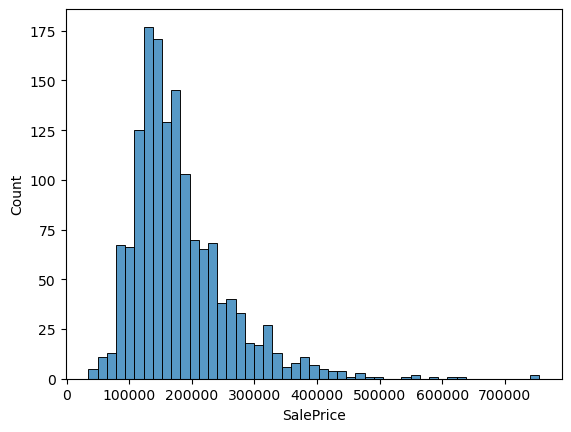

In [11]:
sns.histplot(data=housing, x='SalePrice')

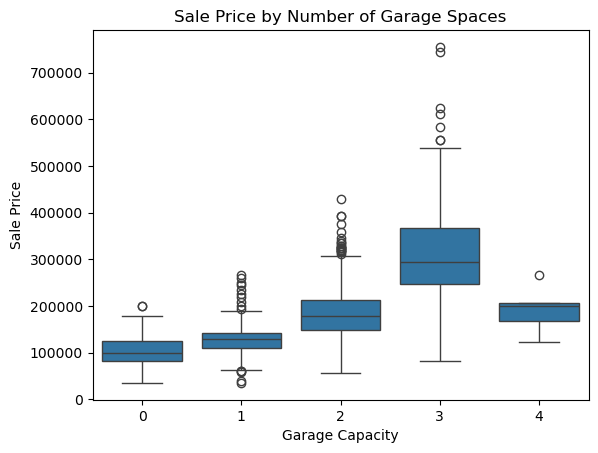

In [12]:
sns.boxplot(data=housing, x='GarageCars', y='SalePrice')
plt.title('Sale Price by Number of Garage Spaces')
plt.xlabel('Garage Capacity')
plt.ylabel('Sale Price')
plt.show()

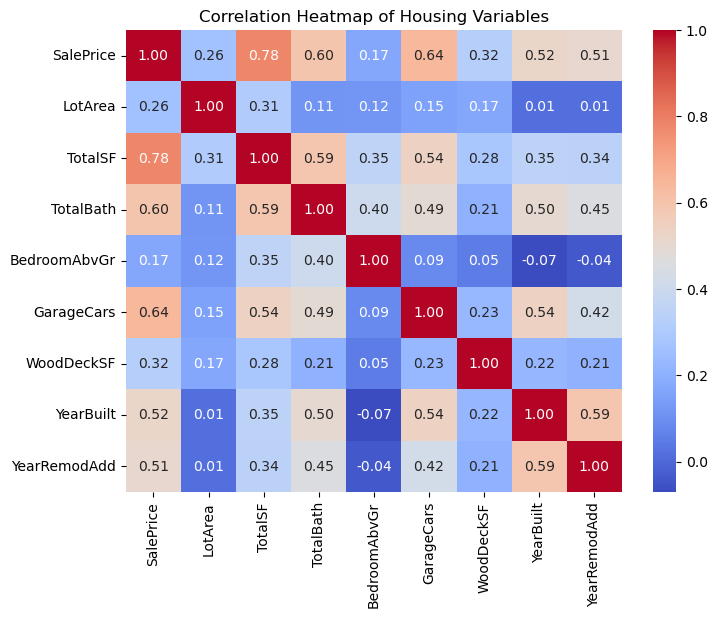

In [13]:
corr = housing.corr()

# 4. Create heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Housing Variables')
plt.show()

**Data Exploration**

We should drop the non-ordinal columns because we can't construct a regression model around these variables. These variables include: Foundation, BldgType, LotConfig. We also dropped KitchenQual because half of the values are unknown.

In [28]:
masterhousing = pd.read_csv("Data/Housing_Prices_24.csv")
cleaned_housing = masterhousing.drop(columns= ['Id','Foundation', 'BldgType', 'LotConfig', 'KitchenQual'])
cleaned_housing['CentralAir'] = cleaned_housing['CentralAir'].map({'Y':1, 'N':0})
cleaned_housing['PavedDrive'] = cleaned_housing['PavedDrive'].map({'Y':1, 'N':0})
cleaned_housing.head(5)

,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,YrSold
0,208500,8450,856,856,854,2,1,3,8,0,...,61,0,0,0,0,2003,2003,1,1.0,2008
1,181500,9600,1262,1262,0,2,0,3,6,1,...,0,0,0,0,0,1976,1976,1,1.0,2007
2,223500,11250,920,920,866,2,1,3,6,1,...,42,0,0,0,0,2001,2002,1,1.0,2008
3,140000,9550,756,961,756,1,0,3,7,1,...,35,272,0,0,0,1915,1970,1,1.0,2006
4,250000,14260,1145,1145,1053,2,1,4,9,1,...,84,0,0,0,0,2000,2000,1,1.0,2008


Then we want to convert the numeric variables that have many 0 but measured in squared footage into binary. So we can see the correlation more clearly.

In [33]:
cleaned_housing['WoodDeckSF'] = (cleaned_housing['WoodDeckSF'] > 0).astype(int)
cleaned_housing['OpenPorchSF'] = (cleaned_housing['OpenPorchSF'] > 0).astype(int)
cleaned_housing['EnclosedPorch'] = (cleaned_housing['EnclosedPorch'] > 0).astype(int)
cleaned_housing['3SsnPorch'] = (cleaned_housing['3SsnPorch'] > 0).astype(int)
cleaned_housing['ScreenPorch'] = (cleaned_housing['ScreenPorch'] > 0).astype(int)
cleaned_housing['PoolArea'] = (cleaned_housing['PoolArea'] > 0).astype(int)
cleaned_housing

,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,YrSold
0,208500,8450,856,856,854,2,1,3,8,0,...,1,0,0,0,0,2003,2003,1,1.0,2008
1,181500,9600,1262,1262,0,2,0,3,6,1,...,0,0,0,0,0,1976,1976,1,1.0,2007
2,223500,11250,920,920,866,2,1,3,6,1,...,1,0,0,0,0,2001,2002,1,1.0,2008
3,140000,9550,756,961,756,1,0,3,7,1,...,1,1,0,0,0,1915,1970,1,1.0,2006
4,250000,14260,1145,1145,1053,2,1,4,9,1,...,1,0,0,0,0,2000,2000,1,1.0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,7917,953,953,694,2,1,3,7,1,...,1,0,0,0,0,1999,2000,1,1.0,2007
1456,210000,13175,1542,2073,0,2,0,3,7,2,...,0,0,0,0,0,1978,1988,1,1.0,2010
1457,266500,9042,1152,1188,1152,2,0,4,9,2,...,1,0,0,0,0,1941,2006,1,1.0,2010
1458,142125,9717,1078,1078,0,1,0,2,5,0,...,0,1,0,0,0,1950,1996,1,1.0,2010


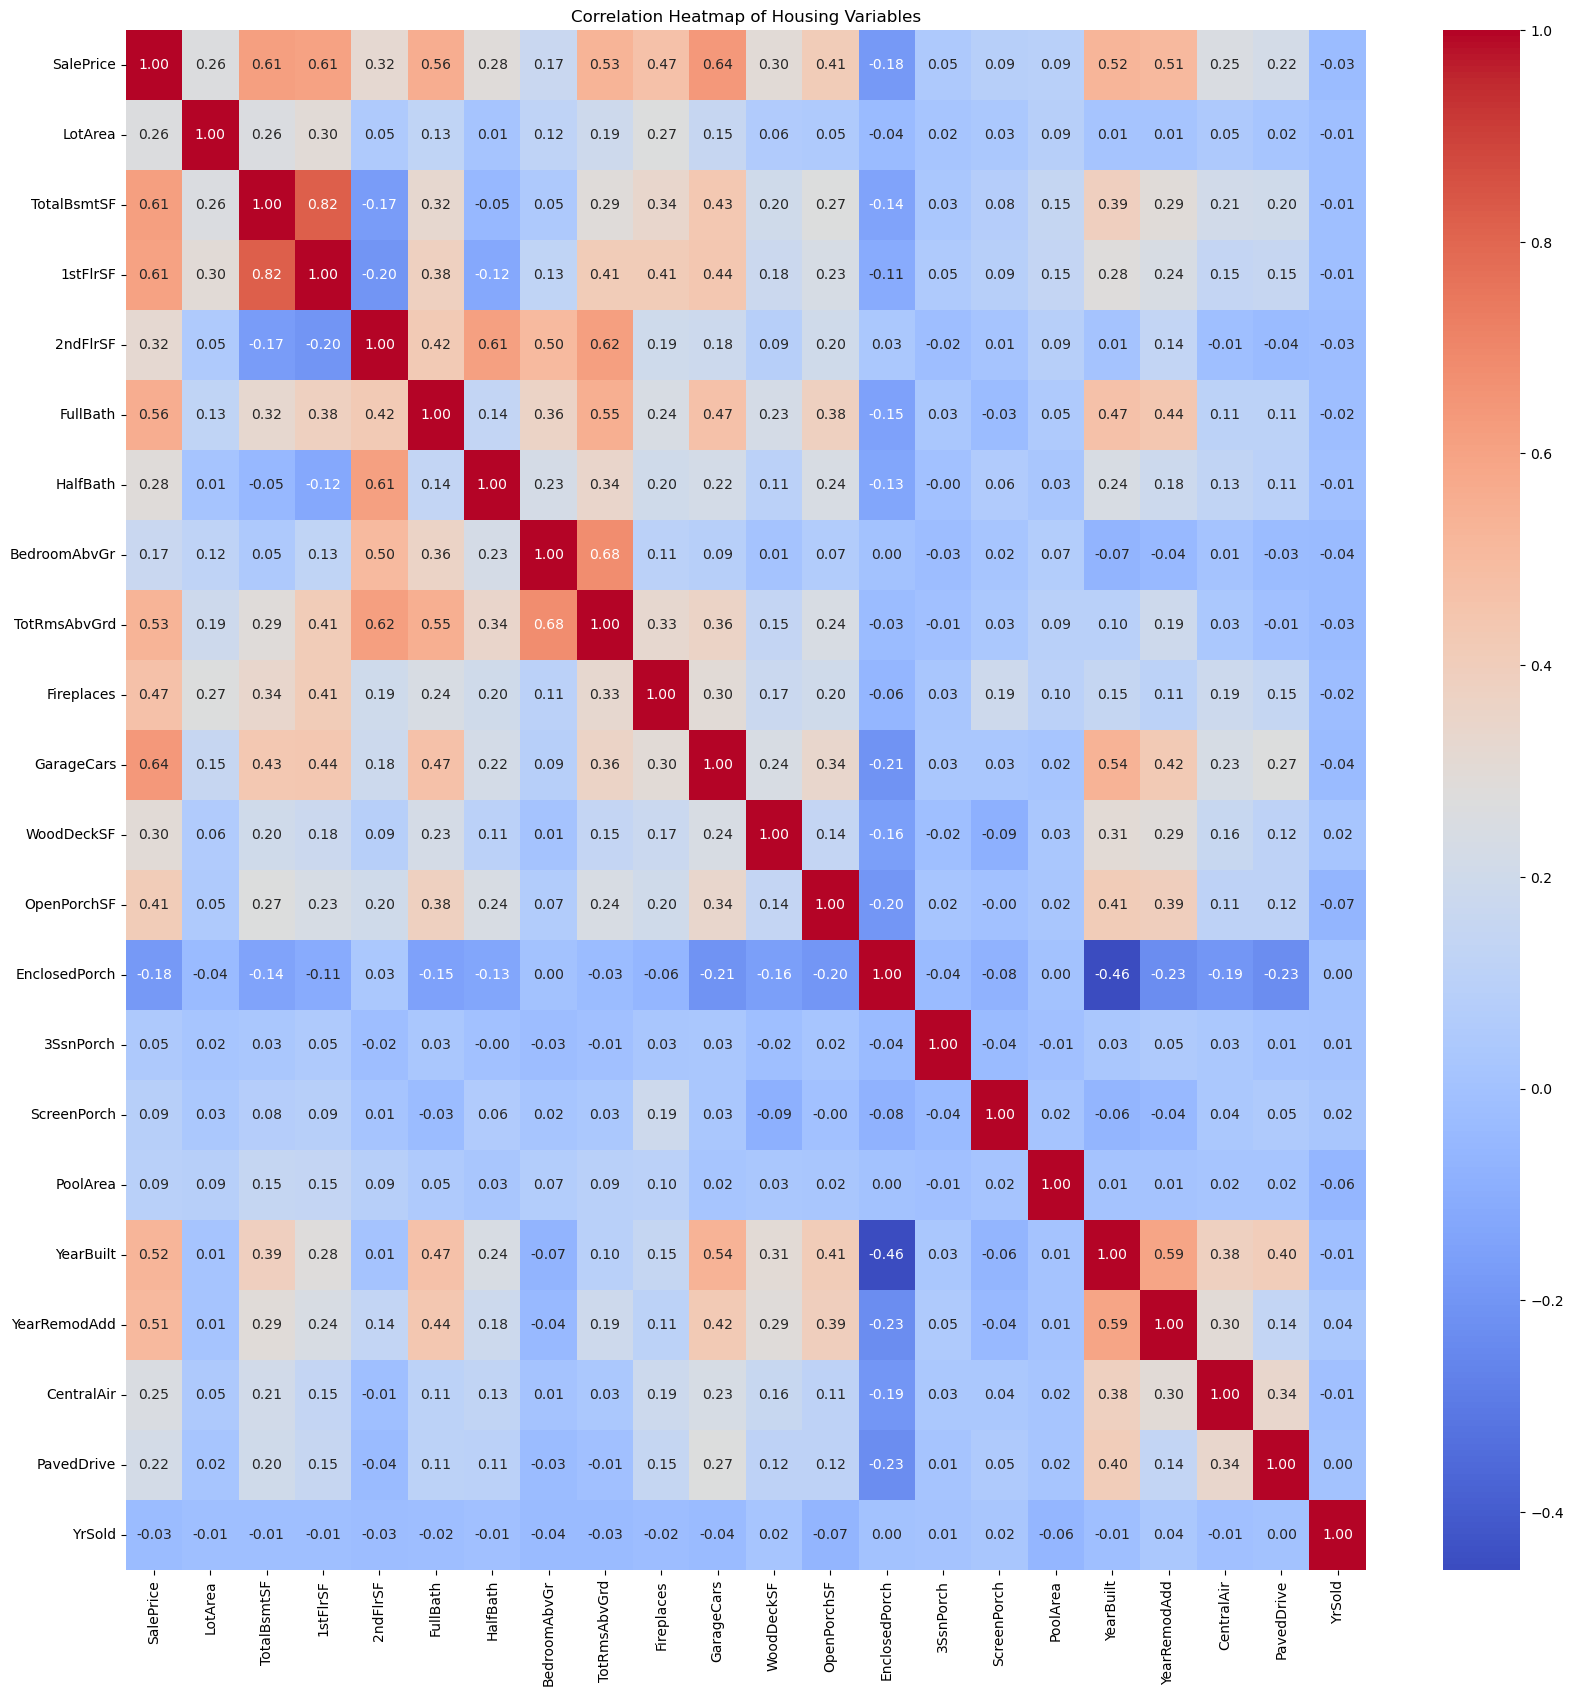

In [34]:
corr = cleaned_housing.corr()

# 4. Create heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Housing Variables')
plt.show()

Dropping variables with abs less than 0.25 corr coeff against SalePrice.

In [42]:
def zscore(col):
    return (col - col.mean()) / col.std()


In [55]:
normalized_housing = cleaned_housing.copy()

for col in cleaned_housing.columns:
    if pd.api.types.is_numeric_dtype(cleaned_housing[col]):
        normalized_housing[col] = zscore(cleaned_housing[col])

In [56]:
normalized_housing

,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YearBuilt,YearRemodAdd,CentralAir,PavedDrive,YrSold
0,0.347154,-0.207071,-0.459145,-0.793162,1.161454,0.789470,1.227165,0.163723,0.911897,-0.950901,...,0.902974,-0.407456,-0.129235,-0.293684,-0.069385,1.050634,0.878367,0.263722,0.25907,0.138730
1,0.007286,-0.091855,0.466305,0.257052,-0.794891,0.789470,-0.761360,0.163723,-0.318574,0.600289,...,-1.106693,-0.407456,-0.129235,-0.293684,-0.069385,0.156680,-0.429430,0.263722,0.25907,-0.614228
2,0.535970,0.073455,-0.313261,-0.627611,1.188943,0.789470,1.227165,0.163723,-0.318574,0.600289,...,0.902974,-0.407456,-0.129235,-0.293684,-0.069385,0.984415,0.829930,0.263722,0.25907,0.138730
3,-0.515105,-0.096864,-0.687089,-0.521555,0.936955,-1.025689,-0.761360,0.163723,0.296662,0.600289,...,0.902974,2.452572,-0.129235,-0.293684,-0.069385,-1.862993,-0.720051,0.263722,0.25907,-1.367186
4,0.869545,0.375020,0.199611,-0.045596,1.617323,0.789470,1.227165,1.389547,1.527133,0.600289,...,0.902974,-0.407456,-0.129235,-0.293684,-0.069385,0.951306,0.733056,0.263722,0.25907,0.138730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.074534,-0.260471,-0.238040,-0.542249,0.794925,0.789470,1.227165,0.163723,0.296662,0.600289,...,0.902974,-0.407456,-0.129235,-0.293684,-0.069385,0.918196,0.733056,0.263722,0.25907,-0.614228
1456,0.366036,0.266316,1.104547,2.354894,-0.794891,0.789470,-0.761360,0.163723,0.296662,2.151479,...,-1.106693,-0.407456,-0.129235,-0.293684,-0.069385,0.222899,0.151813,0.263722,0.25907,1.644646
1457,1.077242,-0.147760,0.215567,0.065634,1.844112,0.789470,-0.761360,1.389547,1.527133,2.151479,...,0.902974,-0.407456,-0.129235,-0.293684,-0.069385,-1.002149,1.023678,0.263722,0.25907,1.644646
1458,-0.488356,-0.080133,0.046889,-0.218907,-0.794891,-1.025689,-0.761360,-1.062101,-0.933810,-0.950901,...,-1.106693,2.452572,-0.129235,-0.293684,-0.069385,-0.704164,0.539309,0.263722,0.25907,1.644646


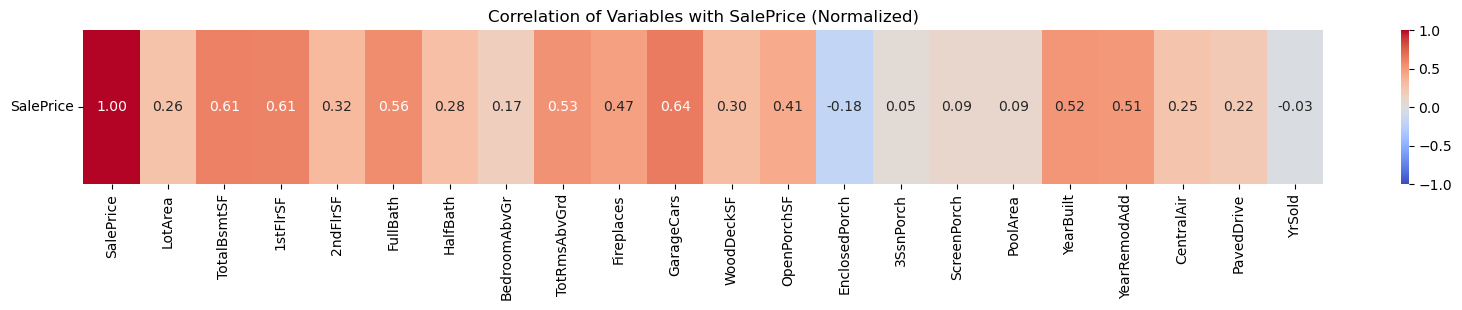

In [57]:
corr_normalized = normalized_housing.corr()

# Extract only the SalePrice row (keep as DataFrame)
saleprice_row = corr_normalized.loc[['SalePrice']]

# Create a heatmap of just that row
plt.figure(figsize=(20, 2))
sns.heatmap(saleprice_row, annot=True, cmap='coolwarm', fmt=".2f",
            vmin=-1, vmax=1)

plt.title('Correlation of Variables with SalePrice (Normalized)')
plt.yticks(rotation=0)  # keep SalePrice label readable
plt.show()


Columns that have a low correlation: BedroomAbvGr, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, CentralAir, PavedDrive, YrSold. Dropping these columns

In [59]:
cleaned_housing = cleaned_housing.drop(columns=['BedroomAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'CentralAir', 'PavedDrive', 'YrSold'])
cleaned_housing

,SalePrice,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,YearBuilt,YearRemodAdd
0,208500,8450,856,856,854,2,1,8,0,2,0,1,2003,2003
1,181500,9600,1262,1262,0,2,0,6,1,2,1,0,1976,1976
2,223500,11250,920,920,866,2,1,6,1,2,0,1,2001,2002
3,140000,9550,756,961,756,1,0,7,1,3,0,1,1915,1970
4,250000,14260,1145,1145,1053,2,1,9,1,3,1,1,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,7917,953,953,694,2,1,7,1,2,0,1,1999,2000
1456,210000,13175,1542,2073,0,2,0,7,2,2,1,0,1978,1988
1457,266500,9042,1152,1188,1152,2,0,9,2,1,0,1,1941,2006
1458,142125,9717,1078,1078,0,1,0,5,0,1,1,0,1950,1996


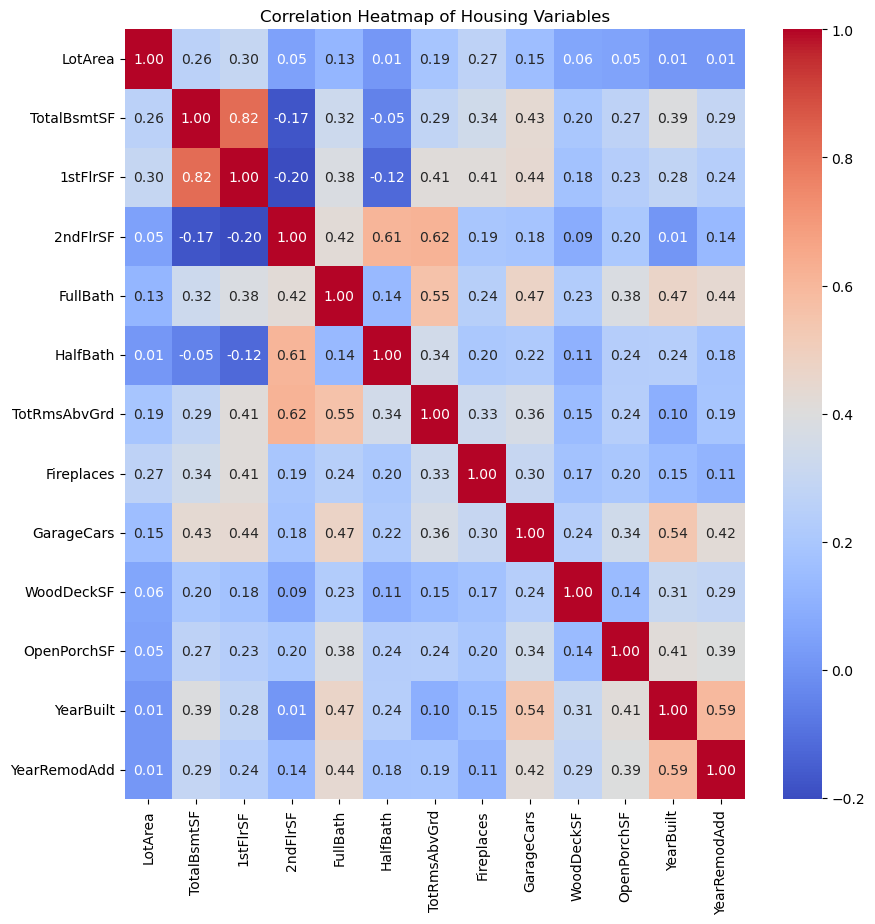

In [62]:
corr = cleaned_housing.drop(columns=['SalePrice']).corr()

# 4. Create heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Housing Variables')
plt.show()

Dropping TotalBsmtSF because correlation is too high with 1stFlrSF >0.8

In [63]:
cleaned_housing = cleaned_housing.drop(columns=['TotalBsmtSF'])

In [64]:
cleaned_housing

,SalePrice,LotArea,1stFlrSF,2ndFlrSF,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,YearBuilt,YearRemodAdd
0,208500,8450,856,854,2,1,8,0,2,0,1,2003,2003
1,181500,9600,1262,0,2,0,6,1,2,1,0,1976,1976
2,223500,11250,920,866,2,1,6,1,2,0,1,2001,2002
3,140000,9550,961,756,1,0,7,1,3,0,1,1915,1970
4,250000,14260,1145,1053,2,1,9,1,3,1,1,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,7917,953,694,2,1,7,1,2,0,1,1999,2000
1456,210000,13175,2073,0,2,0,7,2,2,1,0,1978,1988
1457,266500,9042,1188,1152,2,0,9,2,1,0,1,1941,2006
1458,142125,9717,1078,0,1,0,5,0,1,1,0,1950,1996


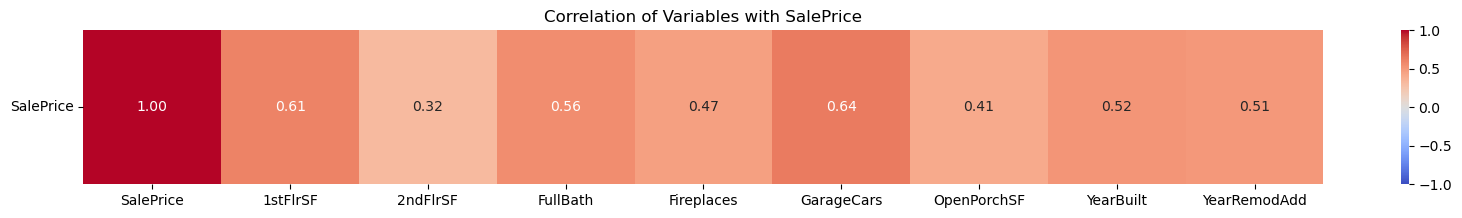

In [68]:
corr3 = cleaned_housing.drop(columns=['TotRmsAbvGrd','LotArea','HalfBath','WoodDeckSF']).corr()
saleprice_row = corr3.loc[['SalePrice']]

# Create a heatmap of just that row
plt.figure(figsize=(20, 2))
sns.heatmap(saleprice_row, annot=True, cmap='coolwarm', fmt=".2f",
            vmin=-1, vmax=1)

plt.title('Correlation of Variables with SalePrice')
plt.yticks(rotation=0)  # keep SalePrice label readable
plt.show()
